In [3]:
# LIBRARY IMPORT
import matplotlib.pyplot as plt
import numpy as np
import os, os.path
import json
import sys


# FUNCTION
# Progress bar for command line during runtime
def progress(count, total, suffix=''):
    bar_len = 60
    filled_len = int(round(bar_len * count / float(total)))

    percents = round(100.0 * count / float(total), 1)
    bar = '=' * filled_len + '-' * (bar_len - filled_len)

    sys.stdout.write('[%s] %s%s ...%s\r' % (bar, percents, '%', suffix))
    sys.stdout.flush()  



In [69]:
# PARAMETER
# countries = ['Vietnam','China','North-Korea','South-Korea']
# countries = ['Philippines','Taiwan','Japan']
countries = ['China']

binsize = 1.


# METHOD
# Get the relative path of the file
REL_PATH = os.path.abspath('.')

Combined_data = []

# DATA contains combined data from all countries
DATA = []

# Load data from all countries
for country in countries:

    # Open and loads data from every country
    with open('%s.json' % country, 'rb') as file:
        source = file.read()
        
        # Get data from each country
        data = json.loads(source)

        # If the country is Japan, delete the first data entry in each data point
        if country =='Japan':
            for item in data:
                for item1 in item:
                    del item1[0]

        # Add cyclone data to the combined data list
        DATA.append(data)


i = 0
# Combine all data together
while i < len(DATA[0]):
    sumup = []
    for item in DATA:
        sumup += item[i]

    Combined_data.append(sumup)
    i += 1

In [70]:
# Create bins of size binsize
bins = np.arange(0,50,binsize)

# Collection of all landfall points
landfall = []
vmax = []
data_points = []
CHECK = []
rmax = []
R26 = []



# Load each cyclone data
cyclone_number = 0
while cyclone_number < len(Combined_data):
    
    # Load data of each cyclone
    cyclone_data = Combined_data[cyclone_number]

    # Load data points
    landfall_location = [[round(item[1]*10)/10,round(item[0]*10)/10,
                (item[2])[2],(item[2])[4],(item[2])[3],
                item[3],item[4]] for item in cyclone_data]

    # If there are landfall
    if len(landfall_location) != 0:
        
        # Check for year larger than 1980 and only include data after 1980
        year_string = str((landfall_location[0])[2])
        year = int(''.join([year_string[0],year_string[1],year_string[2],year_string[3]]))

        # Get the string for cyclone number in the year
        cy = (landfall_location[0])[4]
        cy_string = '%02d' % (cy,)

        # If the year is larger than 1980
        if year >= 1980:

            # This states what latitude bins the landfall points belong to
            inds = np.digitize([item[0] for item in landfall_location],bins)
            
            bin_number = 0
            while bin_number < len(bins):
                
                # Create a list to store latitude points that share a bin
                temp_points = []

                lat_point = 0
                while lat_point < len(inds):
                    if inds[lat_point] == bin_number:

                        # If the points belong to the latitude bin, add to temp_points
                        temp_points.append(landfall_location[lat_point])
                    lat_point += 1

                # If the there are points in the bin
                if len(temp_points) != 0:
                    
                    # Sort using date to get the earliest landfall time
                    temp_points.sort(key=lambda item:item[2])


                    # # CROSS CHECK WITH DATABASE TO GET RMAX AND R26
                    # # cd the folder of cyclone database
                    # os.chdir(os.path.join(REL_PATH,'../../Database/CycloneData/%s') % str(year))
                    
                    # # List all files in the current directory
                    # list_of_files = [os.path.splitext(item) for item in os.listdir('.')]

                    # # Generate file name
                    # file_name = 'bwp%s%s' % (cy_string,str(year))

                    # raw_data = []
                    # for item in list_of_files:
                        
                    #     # If file name matches 
                    #     if item[0] == file_name:
                    #         # Open the file correspond with year and cyclone
                    #         with open(item[0]+item[1],'r') as f:
                    #             #Count the number of lines
                    #             lines= sum(1 for line in enumerate(f))

                    #         # Open the file correspond with year and cyclone
                    #         with open(item[0]+item[1],'r') as f:       
                    #             i = 0
                    #             while i < lines:    
                    #                 #Read each line
                    #                 temp = f.readline()
                    #                 #Split into individual strings before adding to raw_data
                    #                 raw_data.append(temp.split(','),)
                    #                 i += 1 
                    
                    # for item in raw_data:
                    #     # if time data match
                    #     if int(item[2]) == int(year_string):
                    #         try:
                    #             rmax_value = int(item[19])
                    #             if rmax_value != 0:
                    #                 if int(item[11])==50:
                    #                     rmax.append(rmax_value)
                    #                     landfall.append(bins[bin_number])
                    #                     # Add the vmax of the first landfall point
                    #                     vmax.append((temp_points[0])[3])
                    #                     R26_values = []
                    #                     i = 13
                    #                     while i < 17:
                    #                         if int(item[i]) != 0:
                    #                             R26_values.append(int(item[i]))
                    #                         i+=1
                    #                     R26.append(sum(R26_values)/len(R26_values))
                    #         except:
                    #             pass

                    landfall.append(bins[bin_number])
                    
                    # Add the vmax of the first landfall point
                    vmax.append((temp_points[0])[3])

                    # Add the data of the landfall point
                    data_points.append(temp_points[0])

                bin_number += 1
        
    cyclone_number += 1
    progress(cyclone_number,len(Combined_data),'Western')


In [71]:
# Put bins index for latitude
inds = np.digitize(landfall,bins)

# Create a list for mean vmaxs
mean_vmax = []
mean1_vmax = []
std_vmax = []
std1_vmax = []
bin_number = 0
while bin_number < len(bins):
    # Create list to store all vmaxs in the bin
    bin_vmaxs = []

    latitude_number = 0

    while latitude_number < len(landfall):
        
        # Check for points in the bins
        if inds[latitude_number] == bin_number:
            # If the point is in the bin, add vmax to list vmaxs
            bin_vmaxs.append(vmax[latitude_number])
        latitude_number += 1

    # If no point exist, add 0 to list mean vmax
    if len(bin_vmaxs) == 0:
        mean_vmax.append(0)
        std_vmax.append(0)
        mean1_vmax.append(0)
        std1_vmax.append(0)        

    
    # If not, calculate and add the mean
    else:       
        mean_vmax.append(np.mean(bin_vmaxs))
        std_vmax.append(np.std(bin_vmaxs))
        mean1_vmax.append(np.exp(np.mean(np.log(bin_vmaxs))))
        std1_vmax.append(np.exp(np.std(np.log(bin_vmaxs))))
    if len(bin_vmaxs) > 10:
        bin_vmaxs_max = max(bin_vmaxs)
        bin_vmaxs_min = min(bin_vmaxs)
        vmax_bins = np.arange(min(bin_vmaxs),max(bin_vmaxs)+10,5)
                
        # Put bins index for vmax
        vmax_inds = np.digitize(bin_vmaxs,vmax_bins)

        # List to store counts of bins for vmaxs
        vmax_counts = []
        
        vmax_bin_index = 0
        while vmax_bin_index < len(vmax_bins):
            
            temp_vmax_bin = []
            
            i = 0
            while i < len(vmax_inds):
                if vmax_inds[i] == vmax_bin_index:
                    temp_vmax_bin.append(bin_vmaxs[i])
                i += 1
            vmax_counts.append(len(temp_vmax_bin))
            vmax_bin_index += 1

        print bins[bin_number]
        print list(vmax_bins)
        print vmax_counts
            
#         plt.figure()
#         plt.title('Vmax Histogram Latitude %f' % bins[bin_number])
#         plt.xlabel('Vmax')    
#         plt.ylabel('Counts')
#         # plt.hist(bin_vmaxs,vmax_bin)
#         plt.plot(vmax_bins,vmax_counts,'o')
       
    bin_number += 1
    progress(bin_number,len(bins),'vmax')

# plt.show()

# print mean_vmax
# print mean1_vmax
# print std1_vmax


20.0
[15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130]
[0, 8, 4, 8, 12, 12, 7, 10, 4, 9, 2, 9, 8, 6, 4, 1, 8, 1, 2, 0, 0, 2, 0, 1]
21.0
[15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130]
[0, 9, 6, 6, 14, 11, 11, 9, 6, 12, 2, 13, 6, 7, 7, 3, 7, 4, 1, 0, 0, 1, 2, 1]
22.0
[15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130]
[0, 5, 5, 9, 11, 8, 6, 10, 9, 10, 4, 10, 3, 5, 7, 4, 3, 4, 1, 0, 0, 0, 2, 1]
23.0
[15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135]
[0, 2, 6, 11, 15, 6, 10, 13, 8, 13, 7, 15, 11, 2, 3, 3, 5, 2, 0, 1, 1, 0, 0, 1, 1]
24.0
[15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130]
[0, 2, 3, 9, 15, 6, 11, 13, 15, 11, 12, 12, 14, 6, 4, 5, 1, 2, 3, 1, 3, 0, 2, 2]
25.0
[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 8

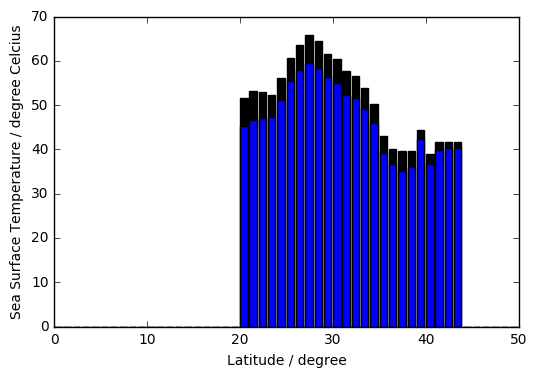

In [72]:
plt.figure()
plt.title('')
plt.xlabel('Latitude / degree')
plt.ylabel('Sea Surface Temperature / degree Celcius')
plt.subplot(111)
plt.bar(bins,mean_vmax,color='k')
plt.subplot(111)
plt.bar(bins,mean1_vmax)
plt.show()